# Занятие 8: Практическое занятие по молекулярной динамике

### Лев Мазаев, мАДБМ18

## Выбранное задание: Моделирование плавления альфа-спирального пептида в формамиде

### 1. Загрузка библиотек и файлов

Вначале будем использовать gromacs, установленный средствами conda:

```bash
conda install -c bioconda gromacs
```

In [1]:
# Визуализация
import nglview as nv
import mdtraj as mdt
from ipywidgets import VBox
from IPython.display import HTML, Image

# Графики
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

_ColormakerRegistry()

Для начала нужно скачать следующие файлы:
- `2xl1.pdb` - координаты пептида
- `fam_em.gro` - файл с ячейкой уравновешенных молекул формамида
- `fam.itp` - файл дополнительной топологии для формамида
- `em.mdp` - файл параметров для минимизации энергии
- `pr.mdp` - файл параметров для "утряски" воды
- `md.mdp` - файл параметров для молекулярной динамики

In [2]:
%%bash
echo 'http://kodomo.cmm.msu.ru/~golovin/pep_melt/2xl1.pdb
http://kodomo.cmm.msu.ru/~golovin/pep_melt/fam_em.gro
http://kodomo.cmm.msu.ru/~golovin/pep_melt/fam.itp
http://kodomo.cmm.msu.ru/~golovin/pep_melt/em.mdp
http://kodomo.cmm.msu.ru/~golovin/pep_melt/pr.mdp
http://kodomo.cmm.msu.ru/~golovin/pep_melt/md.mdp' > urls.txt
wget -q -nc -i urls.txt

Посмотрим как выглядит пептид:

In [3]:
v1 = nv.show_structure_file('2xl1.pdb', representation=[
    {"type": "cartoon", "params": {
        "sele": "protein", "color": "sstruc"
    }}
])
v1

NGLWidget()

### 2. Файл топологии системы

Построим файл топологии системы в силовом поле amber99sb и файл с координатами в формате Gromacs:

In [4]:
%%bash
pdb2gmx -f 2xl1.pdb -o pep -p pep -ff amber99sb -water tip3p -ignh


Using the Amber99sb force field in directory amber99sb.ff

Reading 2xl1.pdb...
Read 'ARGININE ATTENUATOR PEPTIDE', 127 atoms
Analyzing pdb file
Splitting chemical chains based on TER records or chain id changing.
There are 1 chains and 0 blocks of water and 24 residues with 127 atoms

  chain  #res #atoms
  1 'A'    15    127  

Reading residue database... (amber99sb)
Processing chain 1 'A' (127 atoms, 15 residues)
Identified residue SER10 as a starting terminus.
Identified residue ALA24 as a ending terminus.
Checking for duplicate atoms....
Generating any missing hydrogen atoms and/or adding termini.
Now there are 15 residues with 243 atoms
		--------- PLEASE NOTE ------------
You have successfully generated a topology from: 2xl1.pdb.
The Amber99sb force field and the tip3p water model are used.
		--------- ETON ESAELP ------------

gcq#273: "Yeah, uh uh, Neil's Head !" (Neil)



                         :-)  G  R  O  M  A  C  S  (-:

                God Rules Over Mankind, Animals, Cosmos and Such

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can re

В результате исполнения команды получили следующие файлы:
- `pep.gro` - файл со структурой пептида
- `pep.top` - файл с описанием взаимодействий в молекулах
- `posre.itp` - файл с позиционными ограничениями для всех тяжелых атомов в исходном pdb

### 3. Отступ в ячейке от пептида

Сделаем небольшой отступ в ячейке от пептида:

In [5]:
%%bash
editconf -f pep.gro -o pep_ec -d 1.5

Read 243 atoms
Volume: 0.001 nm^3, corresponds to roughly 0 electrons
No velocities found
    system size :  2.065  1.670  1.221 (nm)
    center      :  0.381  0.143 -0.145 (nm)
    box vectors :  0.100  0.100  0.100 (nm)
    box angles  :  90.00  90.00  90.00 (degrees)
    box volume  :   0.00               (nm^3)
    shift       :  2.152  2.192  2.256 (nm)
new center      :  2.532  2.335  2.111 (nm)
new box vectors :  5.065  4.670  4.221 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  99.84               (nm^3)

If the molecule rotates the actual distance will be smaller. You might want
to use a cubic box instead, or why not try a dodecahedron today?


                         :-)  G  R  O  M  A  C  S  (-:

                 Good ROcking Metal Altar for Chronical Sinners

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can red

Получили новый файл `pep_ec.gro` со структурой пептида с отступом.

### 4. Оптимизация геометрии системы

Проведём оптимизацию геометрии системы, чтобы удалить "плохие" контакты в молекуле:

In [6]:
%%bash
grompp -f em -c pep_ec -p pep -o pep_em -maxwarn 1
mdrun -deffnm pep_em -v 2> mdrun1.log # выведем лог mdrun отдельно, чтобы прочесть Fmax

Analysing residue names:
There are:    15    Protein residues
Analysing Protein...
This run will generate roughly 10 Mb of data


                         :-)  G  R  O  M  A  C  S  (-:

                   Good gRace! Old Maple Actually Chews Slate

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redis

Получили следующие файлы:
- `mdout.mdp` - файл параметров расчета mdrun
- `pep_em.tpr` - файл ММ минимизации энергии
- `pep_em.edr` - файл с энергиями
- `pep_em.gro` - файл модели пептида при минимизации энергии 
- `pep_em.log` - лог работы
- `pep_em.trr` - файл с координатами после расчёта

Посмотрим на результат работы mdrun:

In [7]:
! cat mdrun1.log

                         :-)  G  R  O  M  A  C  S  (-:

                   Good gRace! Old Maple Actually Chews Slate

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redis

Стартовое значение F_${max}$: 
>4.37039e+03 on atom 146

Конечное:
>6.059e+02 (atom 189)

Построим график изменения Fmax:


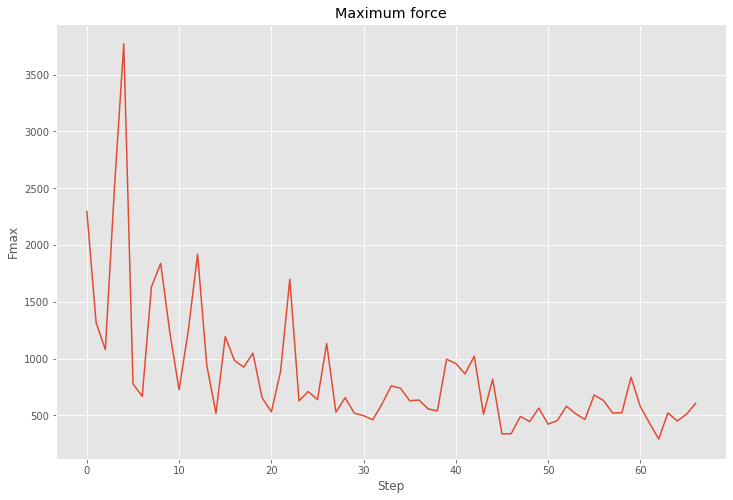

In [8]:
!egrep -o 'Fmax=([0-9.e+]*)' mdrun1.log | cut -c6- > fmax.txt

fmax = np.loadtxt('fmax.txt')

plt.figure(figsize=(12, 8))
plt.plot(fmax)
plt.xlabel('Step')
plt.ylabel('Fmax')
plt.title('Maximum force')
plt.show()

В ходе оптимизации геометрии сила $F_{max}$ уменьшилась примерно в 4 раза.

### 5. Добавление молекул формамида в ячейку

In [9]:
%%bash
genbox -cp pep_em -p pep -cs fam_em.gro -o pep_s


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.

Neighborsearching with a cut-off of 0.45
Table routines are used for coulomb: FALSE
Table routines are used for vdw:     FALSE
Cut-off's:   NS: 0.45   Coulomb: 0.45   LJ: 0.45
System total charge: 0.000
Potential shift: LJ r^-12: 0.000 r^-6 0.000, Coulomb 0.000

Grid: 11 x 10 x 9 cells


                         :-)  G  R  O  M  A  C  S  (-:

        Getting the Right Output Means no Artefacts in Calculating Stuff

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; yo

**Было добавлено 902 молекулы формамида.**

Новый файл: `pep_s.gro` - файл структуры пептида в растворителе. Также обновился файл `pep.top` с взаимодействиями в молекулах.

### 6. Дополнение файла `pep.top`

```
; Include forcefield parameters
#include "amber99sb.ff/forcefield.itp"
#include "fam.itp"
```
---
```
[ molecules ]
; Compound        #mols
Protein_chain_A     1
FAM      902
```

### 7. Нейтрализация заряда системы

Делаем в 2 шага: строим `tpr` и запускаем `genion`:

In [10]:
%%bash
grompp -f em -p pep -c pep_s -o pep_s -maxwarn 1

Analysing residue names:
There are:    15    Protein residues
There are:   902      Other residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
This run will generate roughly 135 Mb of data


                         :-)  G  R  O  M  A  C  S  (-:

                               Grunge ROck MAChoS

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redistribute it a

Суммарный заряд системы: -1. Добавим ион:

```bash
genion -s pep_s -o pep_si -p pep -np 1
```

Нужно выполнять в терминале, так как необходимо ввести группу атомов растворителя. Результат выполнения:

In [11]:
! cat ./logs/genion.log

                         :-)  G  R  O  M  A  C  S  (-:

                   Great Red Oystrich Makes All Chemists Sane

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redis

В результате операции получили файл `pep_si.gro` с добавленным ионом.

### 8. "Утряска" воды

In [12]:
%%bash
grompp -f pr -c pep_si -p pep -o pep_pr -maxwarn 1
mdrun -deffnm pep_pr -v

turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
Analysing residue names:
There are:    15    Protein residues
There are:   901      Other residues
There are:     1        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x40x36, spacing 0.115 0.117 0.117
This run will generate roughly 1 Mb of data


                         :-)  G  R  O  M  A  C  S  (-:

                       GRowing Old MAkes el Chrono Sweat

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you can redistribu

Получили группу файлов `pep_pr.*` с структурой, координатами и прочим.

### 9. Переформатирование gro в pdb и визуализация

In [13]:
%%bash
editconf -f pep_pr.gro -o pep_pr.pdb
editconf -f pep_si.gro -o pep_si.pdb

Read 5650 atoms
Volume: 99.8416 nm^3, corresponds to roughly 44900 electrons
Velocities found
Read 5650 atoms
Volume: 99.8416 nm^3, corresponds to roughly 44900 electrons
No velocities found


                         :-)  G  R  O  M  A  C  S  (-:

           Glycine aRginine prOline Methionine Alanine Cystine Serine

                            :-)  VERSION 4.6.5  (-:

        Contributions from Mark Abraham, Emile Apol, Rossen Apostolov, 
           Herman J.C. Berendsen, Aldert van Buuren, Pär Bjelkmar,  
     Rudi van Drunen, Anton Feenstra, Gerrit Groenhof, Christoph Junghans, 
        Peter Kasson, Carsten Kutzner, Per Larsson, Pieter Meulenhoff, 
           Teemu Murtola, Szilard Pall, Sander Pronk, Roland Schulz, 
                Michael Shirts, Alfons Sijbers, Peter Tieleman,

               Berk Hess, David van der Spoel, and Erik Lindahl.

       Copyright (c) 1991-2000, University of Groningen, The Netherlands.
         Copyright (c) 2001-2012,2013, The GROMACS development team at
        Uppsala University & The Royal Institute of Technology, Sweden.
            check out http://www.gromacs.org for more information.

         This program is free software; you c

In [14]:
pdb1, pdb2 = nv.show_structure_file('pep_si.pdb'), nv.show_structure_file('pep_pr.pdb')
v2 = VBox([pdb1, pdb2])

In [15]:
v2

Сверху - **pep_si**, снизу - **pep_pr**. Видно, что молекулы растворителя на верхней модели образуют стройные ряды, в то время как на нижней модели они расположены хаотично.

### 10. Моделирование

Так как gromacs, установленный с помощью conda не поддерживает ускорение вычислений с помощью видеокарты, самостоятельно скомпилируем gromacs с поддержкой видеоускорителя:

```bash
wget ftp://ftp.gromacs.org/pub/gromacs/gromacs-2019.4.tar.gz
tar xfz gromacs-2019.tar.gz
cd gromacs-2019
mkdir build
cd build
cmake .. -DGMX_BUILD_OWN_FFTW=on -DGMX_GPU=on -DGMX_SIMD=AVX2_256
make
make check
sudo make install
```

Активируем gmx и создадим `pep_md.tpr`:

In [16]:
%%bash
source /usr/local/gromacs/bin/GMXRC.bash
gmx grompp -f md -c pep_pr -p pep -o pep_md -maxwarn 1

turning all bonds into constraints...
turning all bonds into constraints...
turning all bonds into constraints...
Analysing residue names:
There are:    15    Protein residues
There are:   901      Other residues
There are:     1        Ion residues
Analysing Protein...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 350 K
Calculated rlist for 1x1 atom pair-list as 1.023 nm, buffer size 0.023 nm
Set rlist, assuming 4x4 atom pair-list, to 1.000 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 44x40x36, spacing 0.115 0.117 0.117
This run will generate roughly 109 Mb of data


                      :-) GROMACS - gmx grompp, 2019.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

Запустим моделирование в терминале, чтобы наблюдать за шагами:

```bash
gmx mdrun -nt 8 -gpu_id 0 -deffnm pep_md -v
```

Выдача терминала:

In [17]:
! cat ./logs/full_mdrun.log

                      :-) GROMACS - gmx mdrun, 2019.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

Моделирование производилось в 10 миллионов шагов, что соответствует 20 тысячам пикосекунд или 20 наносекундам. То есть, один шаг равен 2 фемтосекундам.

### 11. Визуальный анализ движений молекул

Создадим траекторию (записываем только каждый десятый кадр, выбираем группу Protein):

```bash
gmx trjconv -f pep_md.xtc -s pep_md.tpr -o pep_fit.pdb -skip 10 -fit rot+trans
```

Вывод при создании траектории:

In [18]:
! cat ./logs/traj.log

                     :-) GROMACS - gmx trjconv, 2019.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Be

In [19]:
md = mdt.load_pdb('pep_fit.pdb')

In [20]:
v3 = nv.show_mdtraj(md)
v3.representations = [
    {"type": "cartoon", "params": {
        "sele": "protein", "color": "residueIndex"
    }},
    {"type": "ball+stick", "params": {
        "sele": "hetero"
    }}
]
# v3.clear_representations()
# v3.add_representation(repr_type='licorice')

In [21]:
v3

NGLWidget(max_frame=200)

Как можем заметить, уже на втором кадре (t = 100 ps) происходит изменение структуры пептида: начинают расплетаться концы спирали (N и С). После 100-го кадра (t = 10 ns) C-конец уже полностью расплетен. На последнем кадре (t = 20 ns) оба конца расплетены, начинают расплетаться центральные участки спирали. Видимо, если запустить моделирование с большим числом шагов, пептид полностью расплетётся в линию.

Также ролик, записанный в PyMOL:

In [23]:
HTML("""
    <video width="800" height="600" controls>
        <source src="peptide_in_solvent.mp4" type="video/mp4">
    </video>
""")

### 12. Среднеквадратичное отклонение в ходе моделирования

Определим среднеквадратичное отклонение (RMSD - root mean square deviation) в ходе моделирования относительно стартовой структуры (выбирается группа Protein):

```bash
gmx rms -f pep_md.xtc -s pep_md.tpr -o rms_1
```

Шаг при построении - 10 пикосекунд. Построим график:

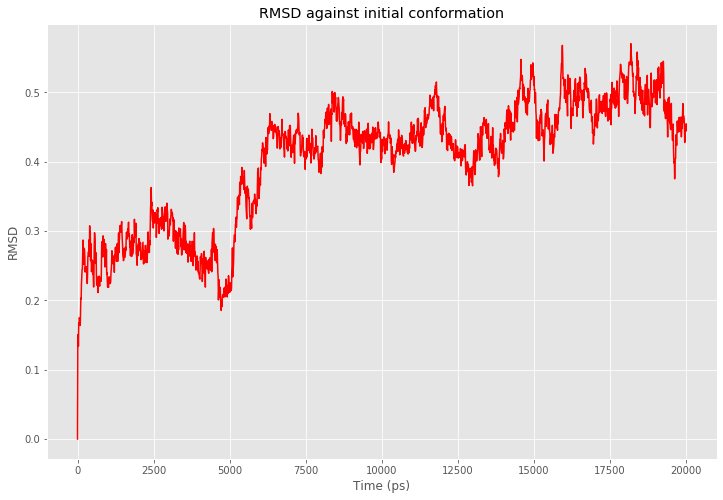

In [24]:
rms1 = np.loadtxt(fname='rms_1.xvg', comments=['#', '@'])
plt.figure(figsize=(12, 8))
plt.plot(rms1[:, 0], rms1[:, 1], 'r')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD')
plt.title('RMSD against initial conformation')
plt.show()

Видим, что в самом начале RMSD резко растёт, так как молекула быстро теряет исходную конформацию. В дальнейшем RMSD растёт с колебаниями.

Теперь RMSD относительно каждой предыдущей структуры на расстоянии 400 кадров:

```bash
gmx rms -f pep_md.xtc -s pep_md.tpr -o rms_2 -prev 400
```
График:

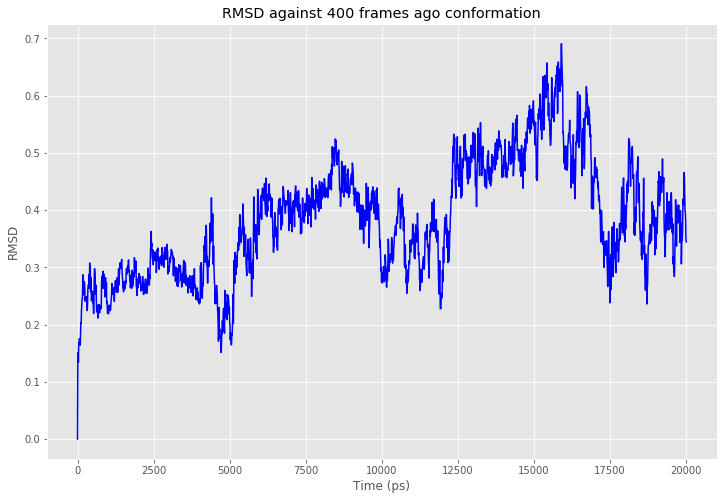

In [25]:
rms2 = np.loadtxt(fname='rms_2.xvg', comments=['#', '@'])
plt.figure(figsize=(12, 8))
plt.plot(rms2[:, 0], rms2[:, 1], 'b')
plt.xlabel('Time (ps)')
plt.ylabel('RMSD')
plt.title('RMSD against 400 frames ago conformation')
plt.show()

В конце отклонение падает относительно максимального, но не уменьшается совсем, значит к моменту t = 20 ns конформационный переход не закончился.

### 13. Изменение гидро-фобной/фильной поверхности в ходе конформационного перехода

Вычисление (`gmx sasa`, т. к. `g_sas` не работает с файлами новой версии):

In [26]:
%%bash
gmx sasa -surface 'group Protein' -output '"Hydrophobic" group Protein and charge {-0.2 to 0.2}; "Hydrophilic" group Protein and not charge {-0.2 to 0.2}' -f pep_md.xtc -s pep_md.tpr -o sas_pep


         based on residue and atom names, since they could not be
         definitively assigned from the information in your input
         files. These guessed numbers might deviate from the mass
         and radius of the atom type. Please check the output
         files if necessary.

NOTE: From version 5.0 gmx sasa uses the Van der Waals radii
from the source below. This means the results may be different
compared to previous GROMACS versions.

++++ PLEASE READ AND CITE THE FOLLOWING REFERENCE ++++
A. Bondi
van der Waals Volumes and Radii
J. Phys. Chem. 68 (1964) pp. 441-451
-------- -------- --- Thank You --- -------- --------



                       :-) GROMACS - gmx sasa, 2019.4 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Ber

График:

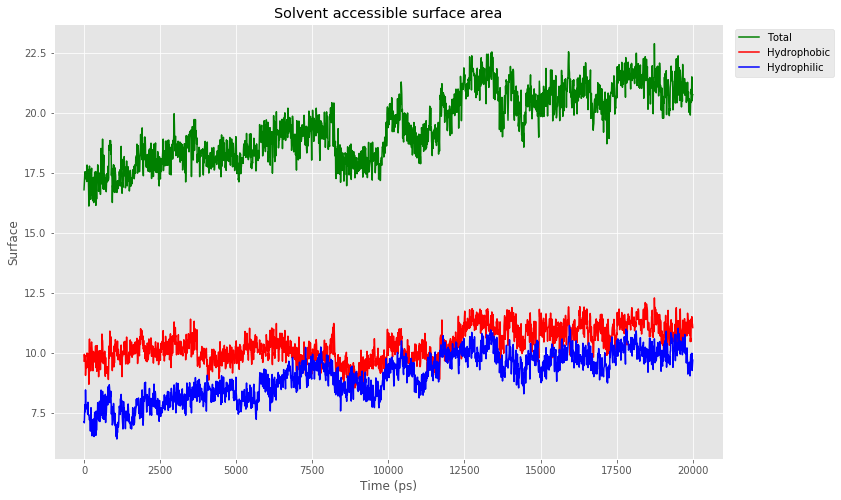

In [27]:
sas = np.loadtxt(fname='sas_pep.xvg', comments=['#', '@'])
plt.figure(figsize=(12, 8))
plt.plot(sas[:, 0], sas[:, 1], 'g')  # Total
plt.plot(sas[:, 0], sas[:, 2], 'r')  # Hydrophobic
plt.plot(sas[:, 0], sas[:, 3], 'b')  # Hydrophilic
plt.xlabel('Time (ps)')
plt.ylabel('Surface')
plt.title('Solvent accessible surface area')
plt.legend(labels=('Total', 'Hydrophobic', 'Hydrophilic'), 
           bbox_to_anchor=(1.01, 1))
plt.show()

Доступная поверхность растёт за счёт расплетения конформации. Гидрофобная поверхность в ходе моделирования меняется несильно (так как сосредоточена на гидрофобных остатках в спирали), а вот гидрофильная растёт с постепенным расплетением. Вероятно, пептид совершает конформационный переход с целью принять более выгодное энергетическое положение за счёт наращивания гидрофильной поверхности.

### 14. Количество водородных связей

Вначале посчитаем число образуемых водородных связей внутри пептида:
    
```bash
gmx hbond -f pep_md.xtc -s pep_md.tpr -num hbond_pep
```

График:

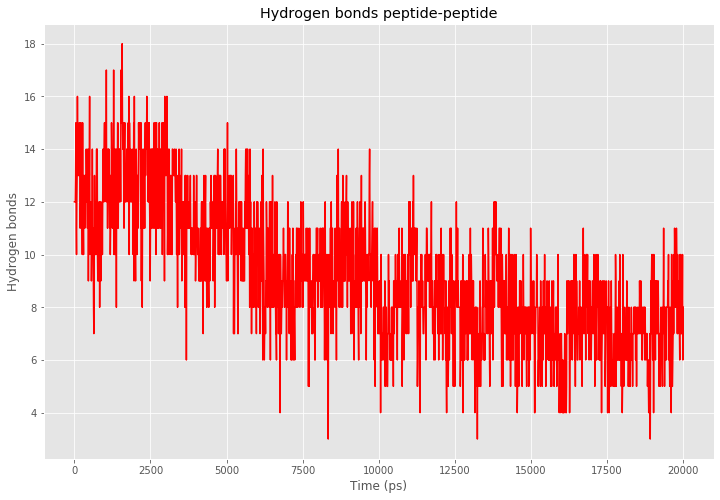

In [28]:
hbonds = np.loadtxt(fname='hbond_pep.xvg', comments=['#', '@'])
plt.figure(figsize=(12, 8))
plt.plot(hbonds[:, 0], hbonds[:, 1], 'r')
plt.xlabel('Time (ps)')
plt.ylabel('Hydrogen bonds')
plt.title('Hydrogen bonds peptide-peptide')
plt.show()

Как видим, количество внутрипептидных водородных связей меняется со временем, уменьшаясь с 12-13 до 8-9 к концу моделирования.

Водородные связи пептид-формамид:

```bash
gmx hbond -f pep_md.xtc -s pep_md.tpr -num hbond_pep_sol
```

График:

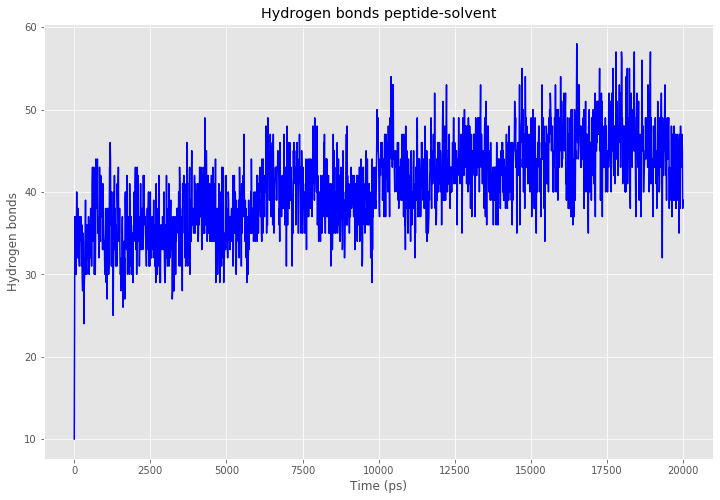

In [29]:
hbonds_sol = np.loadtxt(fname='hbond_pep_sol.xvg', comments=['#', '@'])
plt.figure(figsize=(12, 8))
plt.plot(hbonds_sol[:, 0], hbonds_sol[:, 1], 'b')
plt.xlabel('Time (ps)')
plt.ylabel('Hydrogen bonds')
plt.title('Hydrogen bonds peptide-solvent')
plt.show()

Количество водородных связей с растворителем увеличивается. Учитывая рост гидрофильной поверхности, это вполне логично. Вероятно, конформация с большим числом водородных связей (то есть с увеличившейся гидрофильной поверхностью) становится более энергетически выгодна.

### 15. Разрушение вторичной структуры

Чтобы воспользоваться командой `gmx do_dssp` нужна программа `dssp`. Её можно скачать и установить отсюда: https://github.com/cmbi/dssp. Построим зависимость структуры от времени:

```bash
export DSSP=/usr/local/bin/mkdssp
gmx do_dssp -f pep_md.xtc -s pep_md.tpr -o ss -ver 3
gmx xpm2ps -f ss.xpm -o ss.eps -size 1000 -by 10
convert ss.eps ss.png
```

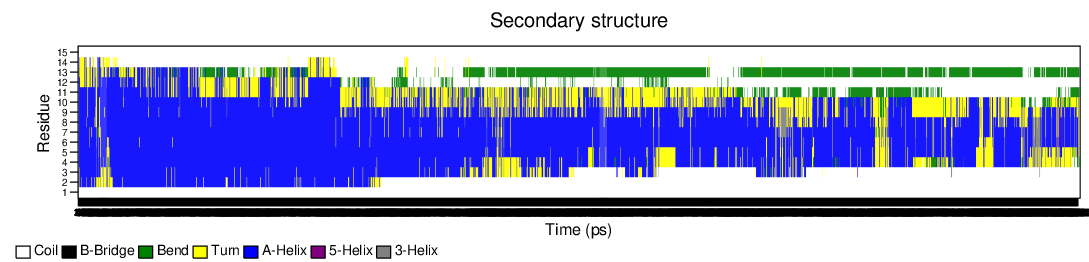

In [30]:
Image('ss.png')

На концах пептида наблюдаются большие изменения вторичной структуры: переход в Bend на C-конце и в Coil на N-конце, A-helix со временем становится все меньше, по краям переходит в Tum. Это согласуется с нашими предыдущими визуальными наблюдениями.